In [1]:
import pyvisa
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rm=pyvisa.ResourceManager()
rm.list_resources()
keithley1= rm.open_resource('GPIB0::24::INSTR')       # Keithley GPIB adress 25
keithley1.write('*RST')
# a=keithley1.query("*IDN?")
# print (a)

6

#### Test parameter set-up

In [8]:
start_current=0        #unit A
stop_current=10
step_current=1
volt_prot='0.1'     #voltage protection level
ontime= 1    # turn on bias before measurement  unit: sec

#File to save
fname='test'             # change file name
directory= "C:\\temp\\"  # change folder name if necessary
dataf=directory+fname+'.csv'
# dataf

#### Keithley current source setup

In [11]:
keithley1.write( ":SYST:CLE")
keithley1.write("SYST:BEEP:STAT OFF")       #   'Beeper off
keithley1.write("SOUR:FUNC:MODE VOLT")
keithley1.write("SENS:FUNC 'CURR:DC'")
keithley1.write("SOUR:VOLT:MODE FIXED")

keithley1.write(":SENS:FUNC:CONC OFF")
# keithley1.write("SENS:FUNC:ON VOLT,CURR")
keithley1.write("SENSE:VOLTAGE:DC:RANGE:AUTO ON")
keithley1.write("SENSE:CURRENT:DC:RANGE:AUTO ON")

keithley1.write( ":SENSE:CURR:PROT " + volt_prot)
keithley1.write( ":FORM:ELEM VOLT,CURR")
keithley1.write(":SENSE:RES:MODE MAN")
keithley1.write(":SYSTEM:RSEN OFF")


18

In [7]:
V=[]
I=[]
R=[]

def measureR(bias):
    curr=str(bias)
    keithley1.write(":SOUR:CURR:LEV:IMM:AMPL "+ curr )
    keithley1.write(':OUTP ON')
    time.sleep(ontime)
    keithley1.write(":READ?")
    vi=keithley1.read()
    resistanceCal(vi)
    keithley1.write(':OUTP OFF')

def resistanceCal(vi):
    volt_curr=vi.rstrip().split(',')
    volt=float(volt_curr[0])
    curr=float(volt_curr[1])
    res=volt/curr
    V.append(volt)
    I.append(curr)
    R.append(res)
   

In [9]:
for i in np.arange(start_current, stop_current+step_current, step_current):
    measureR(i)
    
data=pd.DataFrame({'Volt (mV)':V,
                   'Curr (mA)':I,
                    'Resistance': R})
data.to_csv(dataf)
V.clear()
I.clear()
R.clear()

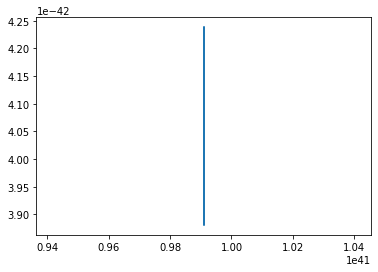

In [10]:
plt.plot(data['Curr (mA)']*1000, data['Resistance'])
plt.show()